<a href="https://colab.research.google.com/github/Soumya169/Deep_Learning_Projects/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D  ,Flatten , BatchNormalization , Dropout

In [5]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
     directory = '/kaggle/input/cat-and-dog/training_set/training_set',
     labels =  'inferred',
     label_mode = 'int',
     batch_size =32,
     image_size=(256 ,256)
)
#generators

validation_ds = keras.utils.image_dataset_from_directory(
     directory ='/kaggle/input/cat-and-dog/test_set/test_set',
     labels =  'inferred',
     label_mode = 'int',
     batch_size =32,
     image_size=(256 ,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [6]:
#Normalize
def process(image , label):
  image = tf.cast(image/255 , tf.float32)
  return image , label
train_ds =train_ds.map(process)
validation_ds =validation_ds.map(process)

In [7]:
#CNN Model

model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3) , padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides =2 , padding ='valid'))

model.add(Conv2D(64,kernel_size=(3,3) , padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides =2 , padding ='valid'))

model.add(Conv2D(128,kernel_size=(3,3) , padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides =2 , padding ='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer ='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [10]:
history = model.fit(train_ds , epochs=10 , validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 158ms/step - accuracy: 0.5482 - loss: 4.5895 - val_accuracy: 0.5017 - val_loss: 1.8324
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.5694 - loss: 0.8145 - val_accuracy: 0.5383 - val_loss: 0.7900
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.6064 - loss: 0.6986 - val_accuracy: 0.6782 - val_loss: 0.6057
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.6732 - loss: 0.6181 - val_accuracy: 0.5660 - val_loss: 0.6789
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7213 - loss: 0.5493 - val_accuracy: 0.7420 - val_loss: 0.5379
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7567 - loss: 0.4960 - val_accuracy: 0.6738 - val_loss: 0.6120
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.7857 - loss: 0.4493 - val_accuracy: 0.7370 - val_loss: 0.6043
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.8211 - loss: 0.3967 -

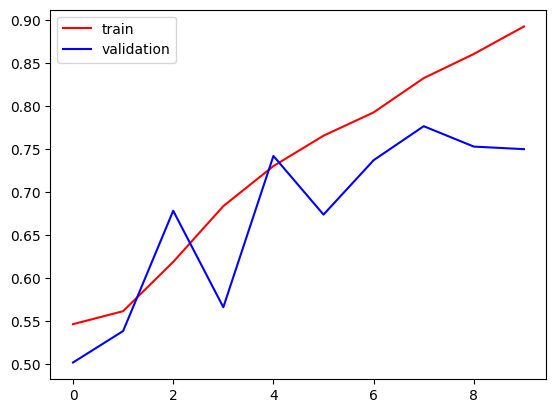

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , color='red' , label='train')
plt.plot(history.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()

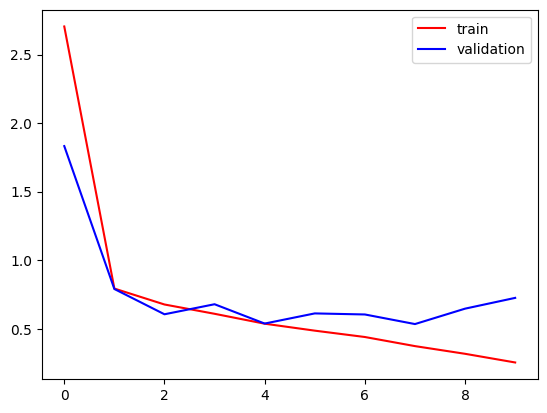

In [12]:
plt.plot(history.history['loss'] , color='red' , label='train')
plt.plot(history.history['val_loss'] , color='blue' , label='validation')
plt.legend()
plt.show()

In [16]:
import cv2

In [19]:
test_img = cv2.imread('/cimages.jpg')
test_img = cv2.resize(test_img, (256,256))
test_img = test_img / 255.0

test_input = test_img.reshape((1,256,256,3))
pred = model.predict(test_input)[0][0]

print("Raw:", pred)
print("Cat" if pred < 0.5 else "Dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Raw: 0.0140198385
Cat


In [22]:
test_img = cv2.imread('/dimages.jpg')
test_img = cv2.resize(test_img, (256,256))
test_img = test_img / 255.0

test_input = test_img.reshape((1,256,256,3))
pred = model.predict(test_input)[0][0]

print("Raw:", pred)
print("Cat" if pred < 0.5 else "Dog")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Raw: 0.88684124
Dog
